In [1]:
Godfrey Beddard 'Applying Maths in the Chemical & Biomolecular Sciences an example-based approach' Chapter 9

SyntaxError: invalid syntax (3171124287.py, line 1)

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from scipy.integrate import quad
init_printing()                         # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

### 1.6 Discontinuous functions

The square wave shown in Fig. 4, has a stepwise discontinuity. When $x \ge 0,\;  f(x) = 1$, and when $x \lt 0,  f (x) = -1$ and the wave repeats itself with a period of $2\pi$. This discontinuous function is sometimes called the _odd signum_ function, sgn($x$). It can be shown that, if the discontinuity occurs in the mid range $-\pi \to \pi$, each integral, $a_n$ and $b_n$, can be split into two, one being taken from $-\pi \to 0$ and the second from $0 \to \pi$. The Fourier series expansion now has coefficients

$$\displaystyle a_n=\frac{1}{\pi}\int_{\pi}^0 (-1)\cos(nx)dx+\frac{1}{\pi}\int_0^{\pi} (+1)\cos(nx)dx $$

and when $n = 0$,

$$\displaystyle a_0=-\frac{1}{\pi}\int_{\pi}^0 1dx+\frac{1}{\pi}\int_0^{\pi} 1dx =0$$

and because the function has odd symmetry $f(-x) = -f(x)$, the cosine integrals and all other $a$ coefficients are zero,

$$\displaystyle a_n=-\frac{1}{\pi}\int_{\pi}^0 \cos(nx)dx+\frac{1}{\pi}\int_0^{\pi}\cos(nx)dx = \frac{2}{\pi}\left. \sin(nx)\right|_{-\pi}^0 = 0$$

The $b$ coefficients are

$$\displaystyle b_n=\frac{1}{\pi}\int_{\pi}^0 (-1)\sin(nx)dx+\frac{1}{\pi}\int_0^{\pi} (+1)\sin(nx)dx = \frac{2}{\pi}\int_0^\pi sin(nx)dx  =  \frac{2}{n\pi}[1-\cos(n\pi)]$$

However, when $n$ is even, the coefficient $b_n$ is zero, because for integer multiples of $\pi$ the cosine is one, and when $n$ is odd the cosine is $-1$, consequently $b_n = 4/n\pi$. The Fourier series equation (1) reduces to

$$\displaystyle g(x) = \sum\limits_{n\,=\,odd}b_n\sin(nx)=\frac{4}{\pi}\sum\limits_{n\,=\,odd}\frac{\sin(nx)}{n} $$


<img src='fourier-fig4.png' alt='Drawing' style='width:600px;'/>
Figure 4. A few cycles of a square wave, which is a discontinuous function. Left shows the function $f(x)$ and right its Fourier reconstruction $g(x)$ via a series of $n = 49$ terms.  The over- and undershoot in the Fourier series as shown on the right hand plot is a phenomenon called the Gibbs phenomenon and is discussed next.

____

### 1.8 The Gibbs phenomenon

The Fourier series of a square wave is shown in fig 4 (right) with a relatively large number of terms. Adding more will improve the fit to the function, but it will never be exact because an _infinite_ number of terms will be needed to follow the right-angled bends at the top and bottom of the wave. This angle effectively corresponds to an infinite sine frequency.

The size of the overshoot remains the same independent of the number of terms; this is called the Gibbs' phenomenon, after J. Willard Gibbs, of thermodynamics fame, who explained its cause as being due to the non-uniform convergence of the Fourier series in the vicinity of a discontinuity. 

It is difficult to prove, but may be seen quite easily graphically; plot the Fourier series approximation to the square wave, say, from $-0.2 \to +0.2$ and with different numbers of terms in the series, and then observe the height of the overshoot. As more terms are added, this becomes closer to zero, but its amplitude above $1$ and below $-1$ remains the same, as shown in the next figure for $10$ and $100$ terms in the series. 

The Gibbs phenomenon was first observed by Michelson who is more famous for the interferometric Michelson - Morley experiment that determined that the speed of light was independent of the position of the earth and thus disproved the hypothesis of the aether. By 1898 Michelson had constructed a machine, called the Harmonic Integrator, that could calculate up to eighty terms in a Fourier series and present the results graphically. He noticed the overshoot and wrote to Gibbs for an explanation thinking his machine was in error. You can see a photograph of this machine in 'A Student's Guide to Fourier Transforms' (James 1995). This book also contains a clear introduction to Fourier transforms.

<img src='fourier-fig5.png' alt='Drawing' style='width:350px;'/>
Figure 5. The Gibbs phenomenon where the over- and undershoot remain at the same size as more and more terms are added to the Fourier series.

## 2 Integrating, differentiating and summing series

If the series for a function $f(x)$ has been calculated then that for $\int f(x)dx$ can be easily calculated, providing that the integration can be performed. Similarly if $df(x)/dx$ is available the series for this can also be obtained. As an example, the series for $x^4$ can be obtained from the Fourier series for $x^3$ by integrating term by term; in addition, integration can lead to a better representation of a function with the same number of terms in the summation. The algebraic result will be different from that of a direct series for $x^4$, but should be just as good a representation. 

The series for $x^3$ is calculated first and as this is an odd function, all the even cosine terms are zero; therefore, all the $a$ coefficients are zero and the series only contains sine or $b$ terms of the form

$$\displaystyle b_n=\frac{1}{\pi}\int_{-\pi}^\pi x^3\sin(nx)dx$$

This and similar integrals can be integrated 'by parts' or the sine converted to an exponential and then integrated; in either case the sine or exponential part is integrated first, so that the power of $x$ is reduced in the second term of the 'by parts' integration. Using sympy the result is shown below.

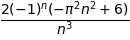

In [2]:
x = symbols('x' )
n = symbols('n',integer=True)
f01 = x**3*sin(n*x)/pi
bn = integrate(f01,(x,-pi,pi),conds='none')
simplify(bn)

As the sine terms are all zero and the cosines alternate 1 for even $n$ or -1 for odd $n$ in the limits $x=\pm n\pi$ and with $n \gt$ 0, the integral is $b_n=2(-1)^{n+1}(\pi^2/n - 6/n^3) $. The expansion of $x^3$ is therefore,

$$\displaystyle x^3 \approx g(x^3) = \sum\limits_{n=1} b_n \sin(nx) = 2(\pi^2-6)\sin(x)-\frac{2\pi^2-3}{2}\sin(2x)+\cdots$$

The series expansion is plotted in Fig 6; notice how the difference in the value of the series for $x^3$ is greatest at the limits $\pm \pi$, and how the series repeats itself. The Fourier series is zero at both -$\pi$ and $\pi$ because it assumes that the function $x^3$ is periodic; thus just before $\pi$ its value is $\pi^3$, and just after -$\pi^3$, and this leads to an overshoot.

Integrating term by term produces a new series, which is,

$$\displaystyle x^4 \approx g(x^4) = 2\int\limits_0^x \sum_{n=1}b_n\sin(nx)dx = 8\sum_{n=1}(-1)^{n+1}(\pi^2/n^2 - 6/n^4)(1-\cos(nx))$$

and the initial $8$ arises because the integration of $x^3$ is $x^4$/4 and $b_n$ was evaluated for $x^3$. The curve for $x^4$ and its Fourier series is shown in Fig.6. The fit is good up to the limit $\pm \pi$, the limit of the initial Fourier series. The $x^4$ series $g(x^4)$ is smoother than the $x^3$ and also a better fit to the curve, and this may be attributed to the integration, which measures the area under a curve and has the effect of smoothing the function.

<img src='fourier-fig6.png' alt='Drawing' style='width:350px;'/>
Figure 6. The functions $x^3$ and $x^4$ are shown as dashed lines. The wiggly solid curve shows the result of having only 20 terms in the $x^3$ summation. The underlying oscillation of the trigonometric terms is obvious, even though the series clearly approximates $x^3$. The $g(x^4)$ series, after integrating the $x^3$ Fourier series, is a considerably better fit than is  the fit to $x^3$.


### 2.1 Summations 

The Fourier series can also be used to evaluate summations; for example the expansion of $x^2$ in the range $\pm \pi$, equation (15), gives

$$\displaystyle  x^2= \frac{\pi^2}{3} - 4 \left ( \cos(x) - \cos(2x)/2^2 + \cos(3x)/3^2 -  \cdots \right ) $$

When $x=\pi/2$, the series produces the result

$$\displaystyle  \frac{\pi^2}{12}= 1-\frac{1}{4}+\frac{1}{9}-\frac{1}{16}+ \cdots \frac{(-1)^n}{n^2}+\cdots $$

where the series limit is taken to infinity. In fact, this series converges very slowly; the alternating sign in $\pm 1/n^2$ terms ensures this, and about 360 terms are needed to obtain a value for π accurate to five decimal places: not really a good way to calculate $\pi$. When $x$ = $\pi$ the series is


$$\displaystyle  \frac{\pi^2}{6}= 1+\frac{1}{4}+\frac{1}{9}+\frac{1}{16}+ \cdots \frac{1}{n^2}+\cdots $$

which converges more rapidly as all the terms have the same sign. Many other unusual summations can be achieved using different Fourier series; however, for us they are only curiosities.

## 3.1 Some formal points about the Fourier series

The sine and cosines making up the Fourier series have two important properties: orthogonality and  completeness.

In the language of vectors, the sine and cosine functions represent a _complete orthogonal basis set_ on which the target function, $f(x)$, is expanded as a sum of $N$ terms. This basis set is of infinite length and is $\sin(x), \sin(2x), \cdots \sin(nx) \cdots$, where $n = 1, 2, \cdots$, and there is a similar set for the cosines with $n$ $\ge$ 0. Any desired accuracy can be achieved, provided that $N$ is large enough. If the basis set functions are also normalized, the set is _orthonormal_ rather than just orthogonal. 

Basis sets often seem rather abstract because we do not often need to use them explicitly. For example, although not normally described in this way, the exponential function $\displaystyle e^x = 1 + x + x^2/2! + x^3/3! \cdots $, is, by contrast, an expansion in the basis set of $x^n$ and the coefficients are $1/0!, 1/1!, 1/2!, 1/3!, \cdots 1/n! \cdots$. This basis set is not orthogonal because the condition for this to apply is that the product of any two elements is zero when taken over the whole range of the set, $\pm \pi$ for sine and cosine. The dot product of any two orthogonal vectors is zero, see Chapter on Vectors section 2.

Similarly for the sine and cosine basis set even though it is continuous, the condition is $\displaystyle \int_{-\pi}^\pi\sin(mx)\sin(nx)dx =\pi\delta_{n,m}$, which is zero if $m \ne n$. This is not true of the coefficient of
the $x^n$ basis set of the exponential expansion, thus we cannot form a Fourier series based on this.

The great importance and usefulness of the Fourier series is that it represents the best fit, in a least-squares way, to any function $f(x)$ because $\displaystyle \int_{-L}^{L}[f(x)-g(x)]^2dx$ is minimized when $g(x)$ is the series expansion of $f(x)$.

A given set of functions, $S_n(x)$ is said to be complete if some other arbitrary function $f(x)$ can be expanded in the set of the $S$ functions. If they have the same boundary conditions, this makes the functions _complete and orthogonal_ in a given range, and in the case of the sine and cosine Fourier series, this range is -$\pi$ to $\pi$. The general series describing $f(x)$, is

$$\displaystyle  g(x) = \sum\limits_{n=1}^\infty q_nS_n(x)  \tag{16}$$

$q_n$ being constants that are related to the target function $f(x)$. If the $S$ functions are orthonormal, then, when $n$ and $m$ are integers, $\displaystyle \int S_n^*(x)S_m(x) dx= \delta_{m,n}$.

In modern mathematics, the term 'Fourier series' does not refer just to the original sine and cosine series, or their complex exponential representation, but to a series formed by other functions that form a complete orthogonal basis set. Often the term generalized Fourier series is used to describe these, but this is not universal. The sine or cosine functions are not unique in forming series and many other functions could be used provided that they can form an orthogonal set. Other such functions include the Hermite polynomials, used to describe the harmonic oscillator wavefunctions, and the Legendre and Chebychev polynomials. In Section 4 it is shown how these can also be used to form series that describe arbitrary target functions $f(x)$.

### 3.2 A general method for numerically calculating a Fourier series

An algorithm is given below with which to calculate the Fourier series of a function and is fairly straightforward if equations (5) and (6) are used and care taken over the integration limits. The function is placed in the first line as and the range is from $\pm 7$, in this example. The target function is $\displaystyle f(x)= e^{-x/2}\sin^2(x)$. The equations (4 to 6) in section 1.2 are used. The series is calculated numerically.

The result of the calculation is shown in Fig. 7 and is compared with the original function, and for most of the curve the fit is tolerably good but not excellent. The main discrepancy is the overshoot, which is the Gibbs phenomenon. 

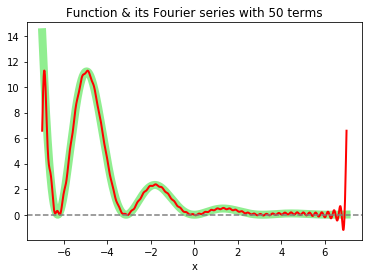

In [3]:
# using numpy first to do algebraic integration

f = lambda x: np.exp(-x/2.0)*np.sin(x)**2           # target function 
L = 7.0                                             # limits +- L
m = 50                                              # number of terms in series 
a0= quad(f,-L,L )[0]/L                              # integrate; the [0] returns just the result and not error as well 

fa = lambda x, n : f(x)*np.cos( n*np.pi*x/L )/L     #  function to give a_n after integration
fb = lambda x, n : f(x)*np.sin( n*np.pi*x/L )/L     #  function to give b_n after integration

numx = 1000                                         # number of data points to plot
x = np.linspace(-L,L,numx)

FS = lambda x: a0/2.0   + sum( quad(fa,-L,L,args=n)[0]*np.cos(n*np.pi*x/L) for n in range(1,m)) \
                        + sum( quad(fb,-L,L,args=n)[0]*np.sin(n*np.pi*x/L) for n in range(1,m))

plt.plot(x,f(x), color ='lightgreen',linestyle='solid',linewidth=8)
plt.plot(x,FS(x),color ='red',linewidth=2)
plt.axhline(0,   color ='grey',linestyle='dashed')
plt.xlabel('x')
plt.title('Function & its Fourier series with '+str(m)+' terms')
plt.show()


**Fig 7**. The original function (thick green line) and its Fourier series (red). As can be seen the fit is not tremendously good although  the series does follow the general shape of the function except at the end points $\pm 7$.

______

## 4 Generalized Fourier series with orthogonal polynomials

The Fourier series expands a function in sine and cosines. In the language of vectors and matrices, the sine and cosines form a basis set in which the function f is expanded. The essential property that any basis set of functions must have is orthogonality. If $\varphi$ is such a function, then the basis set is the functions $\varphi_1, \varphi_2, \cdots$  and the condition for orthogonality is

$$\displaystyle \int_a^b\varphi_m(x)^*\varphi_n(x)dx=c_m\delta_{m,n}    \tag{17}$$

where $c$ is a constant and $\delta$ is the delta function and is zero if $n \ne m$ otherwise it is unity. The asterisk indicates the complex conjugate if the function $\varphi$ is complex. If the functions are normalized as well as being orthogonal, then $c_m  = 1$. The range of the integral, $a$ to $b$, depends on the type of function which might be $\pm 1$ or $\pm \infty$. Some orthogonal polynomials, such as the Hermite polynomials, are so defined that a weighting function $w$, is needed to make them orthogonal. In this case, equation (17) is redefined as

$$\displaystyle \int_a^b\varphi_m(x)^*\varphi_n(x)w(x)dx=c_m\delta_{m,n}    \tag{18}$$

Suppose $f(x)$ is the function we want to expand as a series in the $\varphi$'s. The generalized Fourier series is defined in a simpler way than the normal sine/cosine series, because only one function is involved; hence

$$ f(x)=\sum\limits_{n=0}^\infty a_n\varphi_n  \tag{19}$$

The next task is to find the coefficients $a_n$, and this is done by multiplying both sides of (19) by $\varphi$ and any weighting $w$, and integrating;

$$\displaystyle \int_a^b f(x)\varphi_m(x)w(x)dx=\int_a^b \sum\limits_{n=0}^\infty a_n\varphi_n(x)\varphi_m(x)w(x)dx=\sum\limits_{n=0}^\infty a_nc_n\delta_{n,m}=a_nc_n $$

The summation is taken outside the integral in the second step, because it depends on $n$ not $x$, and the orthogonality (18) is used to solve the integral. The summation disappears in the last step because of the property of the $\delta$ function. The coefficients $a_n$ are therefore,

$$\displaystyle  a_n=\frac{1}{c_n}\int_a^bf(x)\varphi_n(x)w(x)dx  \tag{20} $$

and this equation and (19) form the equations for the generalized Fourier transform. The only way that information about the function $f(x)$ enters the calculation, is _via_ the coefficients $a_n$.

The similarity of (19) to the expansion of a vector in its basis set is clear. In a vector equation in three dimensions, we might write $\displaystyle V=\sum\limits_{m=0}^3v_m \boldsymbol i$ where $\boldsymbol i$ is the unit vector along the $x$-axis, and then the $v_m$ are the projections of the vector $V$ onto this axis. If there were
$n$ dimensions, which clearly cannot be pictured graphically if $n \gt$ 3, then the $v_m$ would be projections of $V$ onto the $m^{th}$ axis. Similarly, in (19) the $a_n$ coefficients are the projections of the function $f(x)$ onto the $\varphi$, but in this case there are more than three 'axes'.

The Legendre polynomial $P_n(x)$ is used as an example of a basis set function with which to calculate the generalized Fourier series of $\displaystyle e^{-x}\cos^3(x)$ over the range $\pm $1. These polynomials appear in problems when an electric charge, perhaps on an ion, is close to other charges, such as from a dipole, or when an electron feels the effect of other electrons and nuclei. All the orthogonal polynomials have several different recursion formulae, and one of the most useful for the Legendre is

$$\displaystyle nP_n(x) = (2n - 1)xP_{n-1}(x) - (n - 1)P_{n-2}(x) $$

for $n = 2, 3, 4, \cdots$ with $P_0(x) = 1$ and $P_1(x) = x$, and the polynomials are defined only over the range $x = \pm $1. The weighting function is 1, and their normalization constant $c_n = 2/(2n + 1)$. Although it is not apparent from the formulae, these polynomials are oscillating functions with an increasing number of nodes as $n$ increases. The Fourier series using Legendre polynomials instead of sine/cosine is sometimes called the Fourier -Legendre series.

The Chebychev polynomials over the range $\pm$1 can be calculated directly as $T_n(x)=\cos(n\cdot\cos^{-1}(x))$. Some Legendre and Chebychev polynomials are shown in the next figure.

<img src='fourier-fig8.png' alt='Drawing' style='width:600px;'/>

Figures 8 & 9.  Left: Legendre polynomials. Right: Chebychev polynomials. The numbers indicate the order, $n$, of the polynomial, $L(n, x)$ or $T(n, x)$. The even numbered ones are drawn with a solid line the odd, dashed. Notice the odd - even nature of the functions corresponds to the index number. Both polynomials are limited to the range $-1 \le x \le 1$.

______


An example of using Legendre polynomials is shown for the function $\cos^2(3x)e^{-x}$ in the next calculation. Equations 19 and 20 are used. The fit to he function is good with only 15 terms in the series. For an extended range then the equations need to be put into reduced units to make the range $\pm 1$.

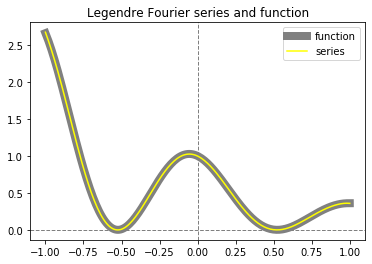

In [4]:
# using legendre polynomials to form a fourier series.
def P(x,n):         # recursion formula
    if n == 0 :
        return 1
    if n == 1:
        return x
    else:
        return ((2*n-1)*x*P(x,n-1)-(n-1)*P(x,n-2))/n  # P(n,x)

f = lambda x: np.cos(3*x)**2*np.exp(-x)    # target function
w = lambda x: 1.0                          # weighting
c = lambda n: 2.0/(2.0*n+1.0)              # normalisation
m = 10                                     # number of terms in series to sum, wiil be v. slow if this is large

numx = 200
x = np.linspace(-1,1,numx)

func  = lambda x,n: f(x)*P(x,n)*w(x) 

LegFS = lambda x,m: sum( quad(func,-1,1,args=(n))[0]*P(x,n)/c(n) for n in range(0,m))    # Legendre Fourier

plt.axhline(0,linestyle='dashed',color='grey',linewidth=1)
plt.axvline(0,linestyle='dashed',color='grey',linewidth=1)
plt.plot(x,f(x),color='gray',linewidth=8,label='function')  # originla function
plt.plot(x,LegFS(x,m),color='yellow',label='series')

plt.title('Legendre Fourier series and function')
plt.legend()
plt.show()

The range of some functions, orthogonal polynomials and weighting factors.

$$\displaystyle \begin{array}{lcc}
\text{}\\
\hline 
\text{Functions} & \text{symbol } f(x) & \text{Range } & \text{Weighting}^1 & \text{normalisation } c_n \\
\hline 
\text{sine/cosine} &                           &\pm\pi\text{ or } \pm L & 1 & \pi \text{ or } L\\
\text{exponenial}  & \exp(i\pi nx/L)           &\pm\pi\text{ or } \pm L & 1 & \pi \text{ or } L\\
\text{Legendre}    &  P_n(x)                   &\pm 1                   & 1 & 2/(2n+1)         \\
\text{Hermite}     &  H_n(x)                   &\pm \infty              & \exp(-x^2)    & 2^nn!\sqrt{\pi}  \\
\text{Laguerre}    &  L_n(x)                   &0\rightarrow\infty      & \exp(-x)      & 1         \\
\text{Chebychev (1st kind) }   &  T_n(x)                   &\pm 1                  & 1/\sqrt{1-x^2} &\text{if } n=0\, \pi \text{ else } \pi/2      \\
\hline
\end{array}$$

$^1$ If the variable $x$ is actually an angle $\theta$ then the volume element for the integration has to be changed from $dx$ to $\sin(\theta)d\theta$ and in these cases $\sin(\theta)$ must multiply the weighting function.

### 4.1 Generating Functions for orthogonal polynomials

The named orthogonal polynomials are the solutions of specific differential equations. They occur widely in physics and chemistry; the Hermite polynomials describe the harmonic oscillator wavefunctions; the Legendre electric charge distributions; and the associated Laguerre the electron distribution in the H atom. The spherical harmonic polynomials are based on the Legendre polynomials, with $x = \cos(\theta)$, and are used to describe the angular momentum in atoms and molecules; they define the shapes of atomic orbitals, the rotational motion of molecules, and the heat flow around spheres.

The orthogonal polynomials, such as the Legendre polynomial used in the previous section, can be produced from a series expansion of a generating function. These functions have two variables $x$ and $u$; expansion is made in the powers of $u$ and the polynomials are the factors belonging to the terms in $u^n$ or $u^n/n!$. A typical series expansion producing polynomial $p_n(x)$ is

$$\displaystyle f(x,u)= p_0(x)+p_1(x)u + p_2(x)\frac{u^2}{2!}+\cdots = \sum\limits_{n=0}p)n(x)\frac{u^n}{n!}$$

This definition has to be checked, however, as some polynomials do not require $u^n$ to be divided by $1/n!$. As an example, the Hermite polynomials can be calculated as the coefficients of $u^n/n!$ in the expansion of $\displaystyle f(x, u)=\exp(-u^2+ 2xu)$, thus the Hermites found from the expansion  $\displaystyle \exp(-u^2+2xu) = \sum\limits_{n=0} H_n(x)u^n/n!$. The expansion is

$$\displaystyle \begin{align}
\exp(-u^2)\exp(2xu)& = \left(1-u^2+\frac{u^4}{2!} -\frac{u^6}{3!} +\cdots \right)\left(1+2xu+4xu^2\frac{u^2}{2!}+8x^3\frac{u^3}{3!} +\cdots \right)\\&= 1+2xu+(4x^2-2)\frac{u^2}{2!}-(8x^3-12x)\frac{u^3}{3!}+\cdots 
\end{align}$$

Using SymPy to do this is simpler, the coefficients in $x$ of $u^n/n!$ are the Hermite polynomials

In [5]:
x,u = symbols('x u')
f01 = exp(-u**2 + 2*x*u)          # expand terms to get series to u^10
s = series(f01,u,n = 15)
print('Hermite Polynomials H(n,x) from n =1 to 9')
for n in range(1,10):
    print('H(',n,',x) ', s.coeff(u**n)*factorial(n))  # extract coefficients. factorial is inbuilt in SymPy


Hermite Polynomials H(n,x) from n =1 to 9
H( 1 ,x)  2*x
H( 2 ,x)  4*x**2 - 2
H( 3 ,x)  8*x**3 - 12*x
H( 4 ,x)  16*x**4 - 48*x**2 + 12
H( 5 ,x)  32*x**5 - 160*x**3 + 120*x
H( 6 ,x)  64*x**6 - 480*x**4 + 720*x**2 - 120
H( 7 ,x)  128*x**7 - 1344*x**5 + 3360*x**3 - 1680*x
H( 8 ,x)  256*x**8 - 3584*x**6 + 13440*x**4 - 13440*x**2 + 1680
H( 9 ,x)  512*x**9 - 9216*x**7 + 48384*x**5 - 80640*x**3 + 30240*x


Other polynomials that are frequently met are the Legendre, associated Legendre, Laguerre, associated Laguerre, and Chebychev. The associated Legendre and associated Laguerre polynomials are obtained by differentiating their respective polynomials by $x$, $n$ times, but in these cases, and perhaps in others also, it is easier to use Rodrigues's derivative formula or one of the recursion equations to generate the polynomials. See Margenau & Murphy (1943) and Arkfen (1970) for a full discussion of these polynomials and generating functions.

The generating function definitions, and a derivative formula for integral $n$ and $k$, are shown in the next table. The associated Legendre generating function is omitted because of its complexity.

It is worth noting in passing that generating functions play a more general role in mathematics than is described here and are used to form various distribution functions and series of numbers. The generating function $1/(1 - x)$ produces a square wave -1, +1 repeating sequence; the function $1/(1 - ax)$ produces the sequence of increasing integer powers of $a$; and $x/(1 - x - x^2)$ generates the Fibonacci sequence. For example,

In [6]:
x = symbols('x')
f01 = x/(1-x-x**2)                    # expand terms to get series to u^10
s = series(f01,x,n = 30)
print('Fibonacci from n = 1 to 20')
for n in range(1,21):
    print(' ', s.coeff(x**n),end='')  # extract coefficients.

Fibonacci from n = 1 to 20
  1  1  2  3  5  8  13  21  34  55  89  144  233  377  610  987  1597  2584  4181  6765

Other generating functions can, for example, be used to work out the number of ways of selecting several items from a list, where the same item can be picked many times.
